## **Import the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# **Import the Data Set**

In [ ]:
books = pd.read_csv("/content/Books.csv")
users = pd.read_csv("/content/Users.csv")
ratings = pd.read_csv("/content/Ratings.csv")


<ipython-input-10-f62b0c27a2e0>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("/content/Books.csv")


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
books.shape

(271360, 8)

In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
users.shape

(278858, 3)

# **Cleaning the DataSet**

In [ ]:
# Check the missing values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
books.dropna(inplace=True)

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [ ]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
 Age = users["Age"].median()

users['Age'].fillna(Age, inplace=True)

In [ ]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
ratings.dropna(inplace=True)

In [ ]:
books.duplicated().sum()

0

In [ ]:
users.duplicated().sum()

0

In [ ]:
ratings.duplicated().sum()

0

# **Data Visualization**

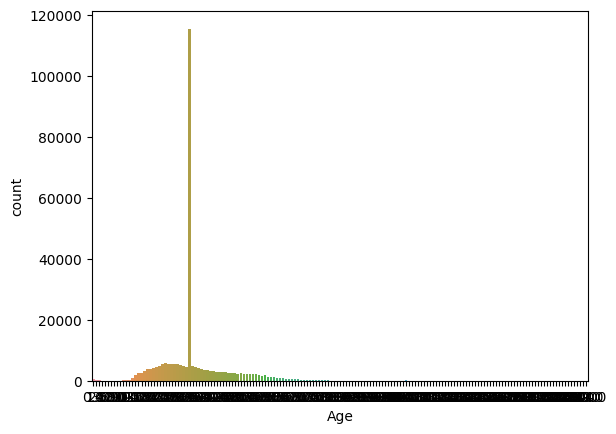

In [ ]:
sns.countplot(x='Age', data=users)
plt.show()

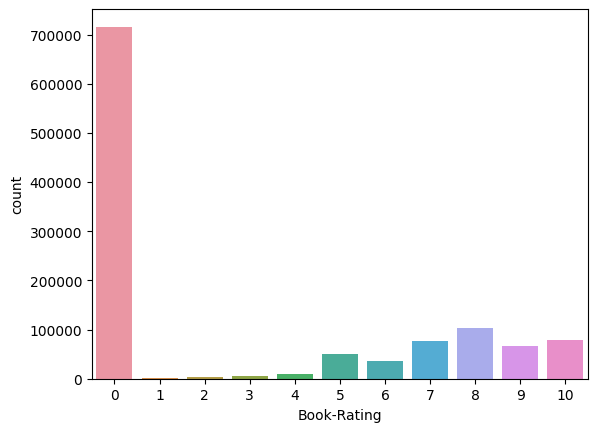

In [ ]:
sns.countplot(x='Book-Rating', data=ratings)
plt.show()

## **Popularity Based Recommender System**

**Based on Books Ratings**

In [ ]:
# merge the books and rating based on ISBN column

ratings_with_name = ratings.merge(books, on = 'ISBN')

In [ ]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031124,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031125,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031126,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031127,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [ ]:
ratings_with_name.shape

(1031129, 10)

In [ ]:
# we will find out the average rating of every books and consider only those books which rating is greater than 200

In [ ]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'}, inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241061,Ã?Â?lpiraten.,2
241062,Ã?Â?rger mit Produkt X. Roman.,4
241063,Ã?Â?sterlich leben.,1
241064,Ã?Â?stlich der Berge.,3


In [ ]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'}, inplace=True)
avg_rating_df

<ipython-input-36-6c529ad03373>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()


,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241061,Ã?Â?lpiraten.,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,5.250000
241063,Ã?Â?sterlich leben.,7.000000
241064,Ã?Â?stlich der Berge.,2.666667


In [ ]:
popular_df = num_rating_df.merge(avg_rating_df, on = 'Book-Title')
popular_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241061,Ã?Â?lpiraten.,2,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241063,Ã?Â?sterlich leben.,1,7.000000
241064,Ã?Â?stlich der Berge.,3,2.666667


In [ ]:
popular_df[popular_df['num_ratings']>=250]

,Book-Title,num_ratings,avg_ratings
80432,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80439,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191608,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187373,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80443,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211380,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219737,To Kill a Mockingbird,510,4.700000


In [ ]:
popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings', ascending = False)

,Book-Title,num_ratings,avg_ratings
80432,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80439,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191608,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187373,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80443,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211380,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219737,To Kill a Mockingbird,510,4.700000


In [ ]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings', ascending = False).head(80)

In [ ]:
popular_df

,Book-Title,num_ratings,avg_ratings
80432,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80439,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191608,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187373,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80443,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211380,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219737,To Kill a Mockingbird,510,4.700000


In [ ]:
# we again merge because we want auther name,image and publication

In [ ]:
popular_df.merge(books, on = 'Book-Title')

,Book-Title,num_ratings,avg_ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...,...,...,...,...,...
152,"The Golden Compass (His Dark Materials, Book 1)",336,4.000000,0679879242,PHILIP PULLMAN,1996,Knopf Books for Young Readers,http://images.amazon.com/images/P/0679879242.0...,http://images.amazon.com/images/P/0679879242.0...,http://images.amazon.com/images/P/0679879242.0...
153,"The Golden Compass (His Dark Materials, Book 1)",336,4.000000,0440418321,PHILIP PULLMAN,2001,Yearling,http://images.amazon.com/images/P/0440418321.0...,http://images.amazon.com/images/P/0440418321.0...,http://images.amazon.com/images/P/0440418321.0...
154,"The Golden Compass (His Dark Materials, Book 1)",336,4.000000,0440238137,PHILIP PULLMAN,2003,Laurel Leaf,http://images.amazon.com/images/P/0440238137.0...,http://images.amazon.com/images/P/0440238137.0...,http://images.amazon.com/images/P/0440238137.0...
155,"The Golden Compass (His Dark Materials, Book 1)",336,4.000000,0613026993,Philip Pullman,1999,Sagebrush Education Resources,http://images.amazon.com/images/P/0613026993.0...,http://images.amazon.com/images/P/0613026993.0...,http://images.amazon.com/images/P/0613026993.0...


In [ ]:
popular_df.merge(books, on = 'Book-Title').drop_duplicates('Book-Title')

,Book-Title,num_ratings,avg_ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,0345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,510,4.700000,0446310786,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...


In [ ]:
popular_df.merge(books, on = 'Book-Title').drop_duplicates('Book-Title').shape

(39, 10)

In [ ]:
popular_df = popular_df.merge(books, on = 'Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Publisher','Image-URL-M','num_ratings','avg_ratings']]

In [ ]:
popular_df

,Book-Title,Book-Author,Publisher,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,Del Rey,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,Del Rey,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,Del Rey,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [ ]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

**Popularity Based is Done, our main aim is to develop collabrative based recommender system**

# **Collabrative Based Recommender System**

**Based on user giving rating on a particular book**

**We take only those users who giving the minimum rating of more than 200 books and we will pick only those books which have minimum 50 ratings**

In [ ]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031124,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031125,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031126,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031127,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [ ]:
ratings_with_name.groupby('User-ID').count()['Book-Rating']

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

**Only 92106 users giving the ratings**

In [ ]:
# Filtering based on user
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

**Only 811 users giving the rating of more than 200 books**

In [ ]:
padhe_likhe_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [ ]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [ ]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030876,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030877,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030878,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030879,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


**The Collection of 811 users voting is 474003**

In [ ]:
# filtering based on books
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [ ]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

**Only 706 books are available which rating is more than 50**

In [ ]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [ ]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026717,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027916,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028770,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029063,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [ ]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026717,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027916,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028770,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029063,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


**No Duplicates are present**

In [ ]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values = 'Book-Rating')

In [ ]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
pt.fillna(0,inplace = True)

In [ ]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**We have Create the required DataSet**

**810--->users**

**706--->Books**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(pt)

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [ ]:
cosine_similarity(pt).shape

(706, 706)

In [ ]:
similarity_scores = cosine_similarity(pt)

In [ ]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [ ]:
def recommend(book_name):
  # index fetch
  index = np.where(pt.index==book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x:x[1],reverse=True)[1:12]


  data = []
  for i in similar_items:
    item = []
    temp_df = books[books['Book-Title'] == pt.index[i[0]]]
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Publisher'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Year-Of-Publication'].values))


    data.append(item)

  return data


In [ ]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg',
  'Signet',
  2004],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg',
  'Fawcett Books',
  1989],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg',
  'Harpercollins',
  1989],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg',
  'Ballantine Books',
  1986],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg',
  'Picador',
  2000],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg',
  'Distribooks Inc',
  1994],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg',
  'Little, Brown',
  1991],
 ['Naked',
  'David Sedar

In [ ]:
pt.index[47]

'Animal Farm'

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))